In [2]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 9.9 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import math
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [4]:
# load iPhone 13 csv files
twt_iphone13_sept = pd.read_csv("twitter2021_iPhone13_September.csv")
twt_iphone13_oct = pd.read_csv("twitter2021_iPhone13_October.csv")
twt_iphone13_nov = pd.read_csv("twitter2021_iPhone13_November.csv")

In [5]:
twt_watch_oct = pd.read_csv("twitter2021_AppleWatch_October.csv")
twt_watch_nov = pd.read_csv("twitter2021_AppleWatch_November.csv")

In [6]:
twt_mbp = pd.read_csv("twitter2021_MacBookPro.csv")

load twitter csv's of each month, delete all columns except date and compound score, set date as the index, sort by increasing date:

In [7]:
twt_iphone13_sept.drop(['Date', 'Time', 'Tweet_Id', 'Text', 'Username', 'neg', 'neu', 'pos'], axis=1, inplace = True)
twt_iphone13_sept['Combined_Stock_Date'] = pd.to_datetime(twt_iphone13_sept['Combined_Stock_Date'])
twt_iphone13_sept.dropna(axis = 0, how = 'all', inplace = True)
twt_iphone13_sept.set_index('Combined_Stock_Date', inplace=True)
twt_iphone13_sept = twt_iphone13_sept.sort_values(by=['Combined_Stock_Date'])
# twt_iphone13_sept

In [8]:
twt_iphone13_oct.drop(['Date', 'Time', 'Tweet_Id', 'Text', 'Username', 'neg', 'neu', 'pos'], axis=1, inplace = True)
twt_iphone13_oct['Combined_Stock_Date'] = pd.to_datetime(twt_iphone13_oct['Combined_Stock_Date'], errors='coerce')
twt_iphone13_oct.dropna(axis = 0, how = 'all', inplace = True)
twt_iphone13_oct.set_index('Combined_Stock_Date', inplace=True)
twt_iphone13_oct = twt_iphone13_oct.sort_values(by=['Combined_Stock_Date'])
# twt_iphone13_oct

In [9]:
twt_iphone13_nov.drop(['Date', 'Time', 'Tweet_Id', 'Text', 'Username', 'neg', 'neu', 'pos'], axis=1, inplace = True)
twt_iphone13_nov['Combined_Stock_Date'] = pd.to_datetime(twt_iphone13_nov['Combined_Stock_Date'], errors='coerce')
twt_iphone13_nov.dropna(axis = 0, how = 'all', inplace = True)
twt_iphone13_nov.set_index('Combined_Stock_Date', inplace=True)
twt_iphone13_nov = twt_iphone13_nov.sort_values(by=['Combined_Stock_Date'])
# twt_iphone13_nov

In [10]:
twt_watch_oct.drop(['Date', 'Time', 'Tweet_Id', 'Text', 'Username', 'neg', 'neu', 'pos'], axis=1, inplace = True)
twt_watch_oct['Combined_Stock_Date'] = pd.to_datetime(twt_watch_oct['Combined_Stock_Date'])
twt_watch_oct.dropna(axis = 0, how = 'all', inplace = True)
twt_watch_oct.set_index('Combined_Stock_Date', inplace=True)
twt_watch_oct = twt_watch_oct.sort_values(by=['Combined_Stock_Date'])
# twt_watch_oct

In [11]:
twt_watch_nov.drop(['Date', 'Time', 'Tweet_Id', 'Text', 'Username', 'neg', 'neu', 'pos'], axis=1, inplace = True)
twt_watch_nov['Combined_Stock_Date'] = pd.to_datetime(twt_watch_nov['Combined_Stock_Date'], errors='coerce')
twt_watch_nov.dropna(axis = 0, how = 'all', inplace = True)
twt_watch_nov.set_index('Combined_Stock_Date', inplace=True)
twt_watch_nov = twt_watch_nov.sort_values(by=['Combined_Stock_Date'])
# twt_watch_nov

In [12]:
twt_mbp.drop(['Date', 'Time', 'Tweet_Id', 'Text', 'Username', 'neg', 'neu', 'pos'], axis=1, inplace = True)
twt_mbp.drop(twt_mbp.columns[twt_mbp.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
twt_mbp['Combined_Stock_Date'] = pd.to_datetime(twt_mbp['Combined_Stock_Date'], errors='coerce')
twt_mbp.dropna(axis = 0, how = 'all', inplace = True)
twt_mbp.set_index('Combined_Stock_Date', inplace=True)
twt_mbp = twt_mbp.sort_values(by=['Combined_Stock_Date'])
# twt_mbp.head()

In [13]:
# concatenate all twitter months in one dateframe and resample to take the mean score of each day
twt_iphone13 = pd.concat([twt_iphone13_sept, twt_iphone13_oct, twt_iphone13_nov])
# twt_iphone13 = twt_iphone13.loc[~(twt==0).all(axis=1)]
# twt_iphone13.head()

In [14]:
twt_watch = pd.concat([twt_watch_oct, twt_watch_nov])
# twt_watch = twt_watch.loc[~(twt==0).all(axis=1)]
# twt_watch.head()

In [15]:
twt_iphone13 = twt_iphone13.resample('1D').mean()
twt_iphone13.dropna(axis = 0, how = 'all', inplace = True)
# twt_iphone13

In [16]:
twt_watch = twt_watch.resample('1D').mean()
twt_watch.dropna(axis = 0, how = 'all', inplace = True)
# twt_watch

In [17]:
twt_mbp = twt_mbp.resample('1D').mean()
twt_mbp.dropna(axis = 0, how = 'all', inplace = True)
# twt_mbp

In [18]:
# load apple stock data from api
apple_stock = pdr.get_data_yahoo("AAPL", start="2021-09-24", end="2021-11-23")
apple_stock.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
# apple_stock

[*********************100%***********************]  1 of 1 completed


In [19]:
# join twitter iPhone13 and apple data in one dataframe
iphone13_plt = twt_iphone13.join(apple_stock[(apple_stock.index >= '2021-09-24') & (apple_stock.index <= '2021-11-22')])
iphone13_plt.dropna(axis = 0, how = 'any', inplace = True)
iphone13_plt.head()

,compound,Adj Close
Combined_Stock_Date,,
2021-09-24,0.175191,146.705887
2021-09-27,0.153867,145.158142
2021-09-28,0.147555,141.703186
2021-09-29,0.164456,142.621857
2021-09-30,0.169581,141.293793


In [20]:
# join twitter Apple Watch and apple data in one dataframe
watch_plt = twt_watch.join(apple_stock[(apple_stock.index >= '2021-10-15') & (apple_stock.index <= '2021-11-22')])
watch_plt.dropna(axis = 0, how = 'any', inplace = True)
watch_plt.head()

,compound,Adj Close
Combined_Stock_Date,,
2021-10-15,0.145186,144.628922
2021-10-18,0.131290,146.336426
2021-10-19,0.134891,148.543198
2021-10-20,0.138835,149.042480
2021-10-21,0.149841,149.262146


In [21]:
# join twitter MacBook Pro and apple data in one dataframe
mbp_plt = twt_mbp.join(apple_stock[(apple_stock.index >= '2021-10-26') & (apple_stock.index <= '2021-11-22')])
mbp_plt.dropna(axis = 0, how = 'any', inplace = True)
mbp_plt.head()

,compound,Adj Close
Combined_Stock_Date,,
2021-10-26,0.153885,149.102402
2021-10-27,0.152770,148.633087
2021-10-28,0.146498,152.347656
2021-10-29,0.154254,149.581696
2021-11-01,0.156944,148.742920


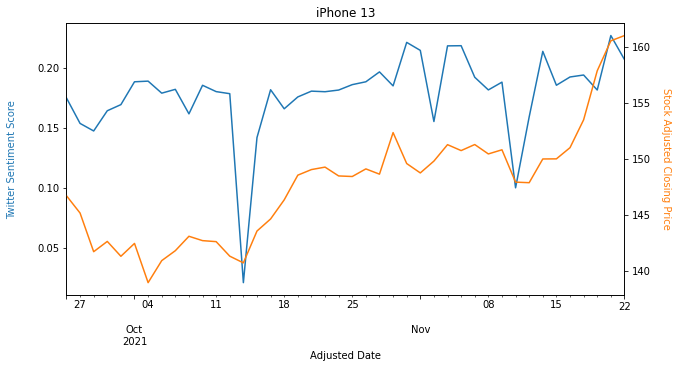

In [22]:
fig, ax1 = plt.subplots()
iphone13_plt['compound'].plot(ax=ax1) 
iphone13_plt['Adj Close'].plot(ax=ax1, secondary_y=True, figsize=(10, 5), title='iPhone 13')

ax1.set_xlabel('Adjusted Date', fontsize=10)
ax1.set_ylabel('Twitter Sentiment Score', fontsize=10, labelpad=20)
ax1.right_ax.set_ylabel('Stock Adjusted Closing Price', rotation=-90, labelpad=20)

ax1.yaxis.label.set_color('#1f77b4')
ax1.right_ax.yaxis.label.set_color('#ff7f0e')

plt.show()

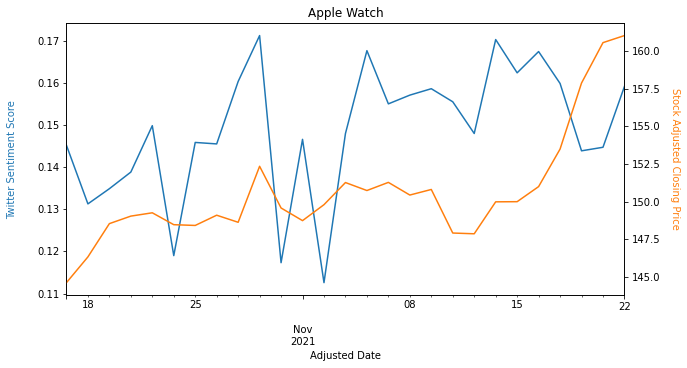

In [23]:
fig, ax2 = plt.subplots()
watch_plt['compound'].plot(ax=ax2) 
watch_plt['Adj Close'].plot(ax=ax2, secondary_y=True, figsize=(10, 5), title='Apple Watch')

ax2.set_xlabel('Adjusted Date', fontsize=10)
ax2.set_ylabel('Twitter Sentiment Score', fontsize=10, labelpad=20)
ax2.right_ax.set_ylabel('Stock Adjusted Closing Price', rotation=-90, labelpad=20)

ax2.yaxis.label.set_color('#1f77b4')
ax2.right_ax.yaxis.label.set_color('#ff7f0e')

plt.show()

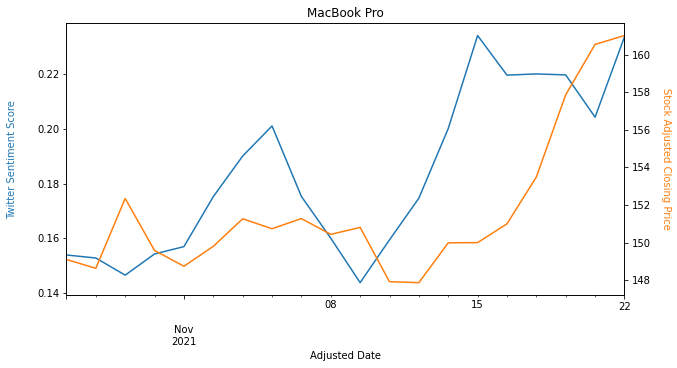

In [24]:
fig, ax3 = plt.subplots()
mbp_plt['compound'].plot(ax=ax3) 
mbp_plt['Adj Close'].plot(ax=ax3, secondary_y=True, figsize=(10, 5), title='MacBook Pro')

ax3.set_xlabel('Adjusted Date')
ax3.set_ylabel('Twitter Sentiment Score', labelpad=20)
ax3.right_ax.set_ylabel('Stock Adjusted Closing Price', rotation=-90, labelpad=20)

ax3.yaxis.label.set_color('#1f77b4')
ax3.right_ax.yaxis.label.set_color('#ff7f0e')

plt.show()

In [32]:
twt = pd.concat([twt_iphone13, twt_watch, twt_mbp])
twt = twt.resample('1D').mean()
twt.dropna(axis = 0, how = 'all', inplace = True)
twt = twt.join(apple_stock)
twt.head()

,compound,Adj Close
Combined_Stock_Date,,
2021-09-24,0.175191,146.705887
2021-09-27,0.153867,145.158142
2021-09-28,0.147555,141.703186
2021-09-29,0.164456,142.621857
2021-09-30,0.169581,141.293793


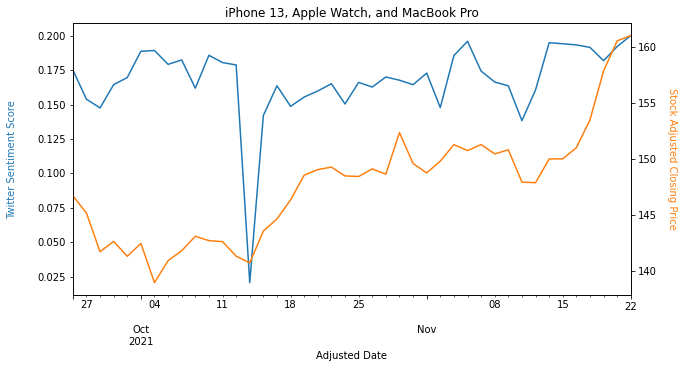

In [33]:
fig, ax4 = plt.subplots()
twt['compound'].plot(ax=ax4) 
twt['Adj Close'].plot(ax=ax4, secondary_y=True, figsize=(10, 5), title='iPhone 13, Apple Watch, and MacBook Pro')

ax4.set_xlabel('Adjusted Date')
ax4.set_ylabel('Twitter Sentiment Score', labelpad=20)
ax4.right_ax.set_ylabel('Stock Adjusted Closing Price', rotation=-90, labelpad=20)

ax4.yaxis.label.set_color('#1f77b4')
ax4.right_ax.yaxis.label.set_color('#ff7f0e')

plt.show()